In [132]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
⌃ [13f3f980] CairoMakie v0.15.4
  [780c37f4] Carlo v0.2.5
⌃ [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2
⌃ [033835bb] JLD2 v0.5.15
  [ebeed567] PeriodicArrays v0.1.0 `../../../PeriodicArrays.jl#main`
  [90137ffa] StaticArrays v1.9.14
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [133]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5
using JLD2
using LinearAlgebra
using PeriodicArrays
using StaticArrays

In [134]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:T, :K, :Lx, :Ly, :Mag, :Energy, :Dxπ, :Dyπ, :P, :J_s],
)

cleandata (generic function with 1 method)

In [135]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false, label="")
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals; label)
    if line
        lines!(data[:, x], vals)
    end
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        if line
            lines!(group[:, x], vals)
        end
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [143]:
jobname = "large-sys"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K, :Lx])

Row,T,K,Lx,Ly,Mag,Energy,Dxπ,Dyπ,P,J_s
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,80,80,0.000767±1.8e-5,-1.99499±8.5e-6,0.98849±0.00011,0.98848±0.00011,0.0163±0.0021,0.0163±0.0021
2,0.05,-0.005,80,80,0.001688±1.3e-5,-1.95467±3.9e-5,0.93955±0.00061,0.9395±0.00061,0.0352±0.0028,0.0359±0.0027
3,0.1,-0.005,80,80,0.002436±1.6e-5,-1.9036±2.8e-5,0.8771±0.0011,0.8771±0.0011,0.0462±0.003,0.0481±0.0031
4,0.15,-0.005,80,80,0.003±1.7e-5,-1.85168±3.8e-5,0.811±0.0013,0.8109±0.0013,0.0587±0.004,0.0615±0.0039
5,0.2,-0.005,80,80,0.003515±1.7e-5,-1.79894±5.9e-5,0.7376±0.0028,0.7375±0.0028,0.0573±0.0039,0.0761±0.0041
6,0.25,-0.005,80,80,0.003976±1.9e-5,-1.74506±6.4e-5,0.6609±0.0036,0.6608±0.0036,0.058±0.0036,0.0863±0.0035
7,0.3,-0.005,80,80,0.004397±1.7e-5,-1.69017±0.00012,0.598±0.0046,0.5979±0.0046,0.0721±0.0033,0.091±0.003
8,0.35,-0.005,80,80,0.004761±1.4e-5,-1.63378±0.00013,0.4967±0.0071,0.4966±0.0071,0.0986±0.0056,0.1252±0.0055
9,0.4,-0.005,80,80,0.005152±1.3e-5,-1.57597±0.00012,0.417±0.0093,0.4169±0.0093,0.0916±0.0067,0.1212±0.0077


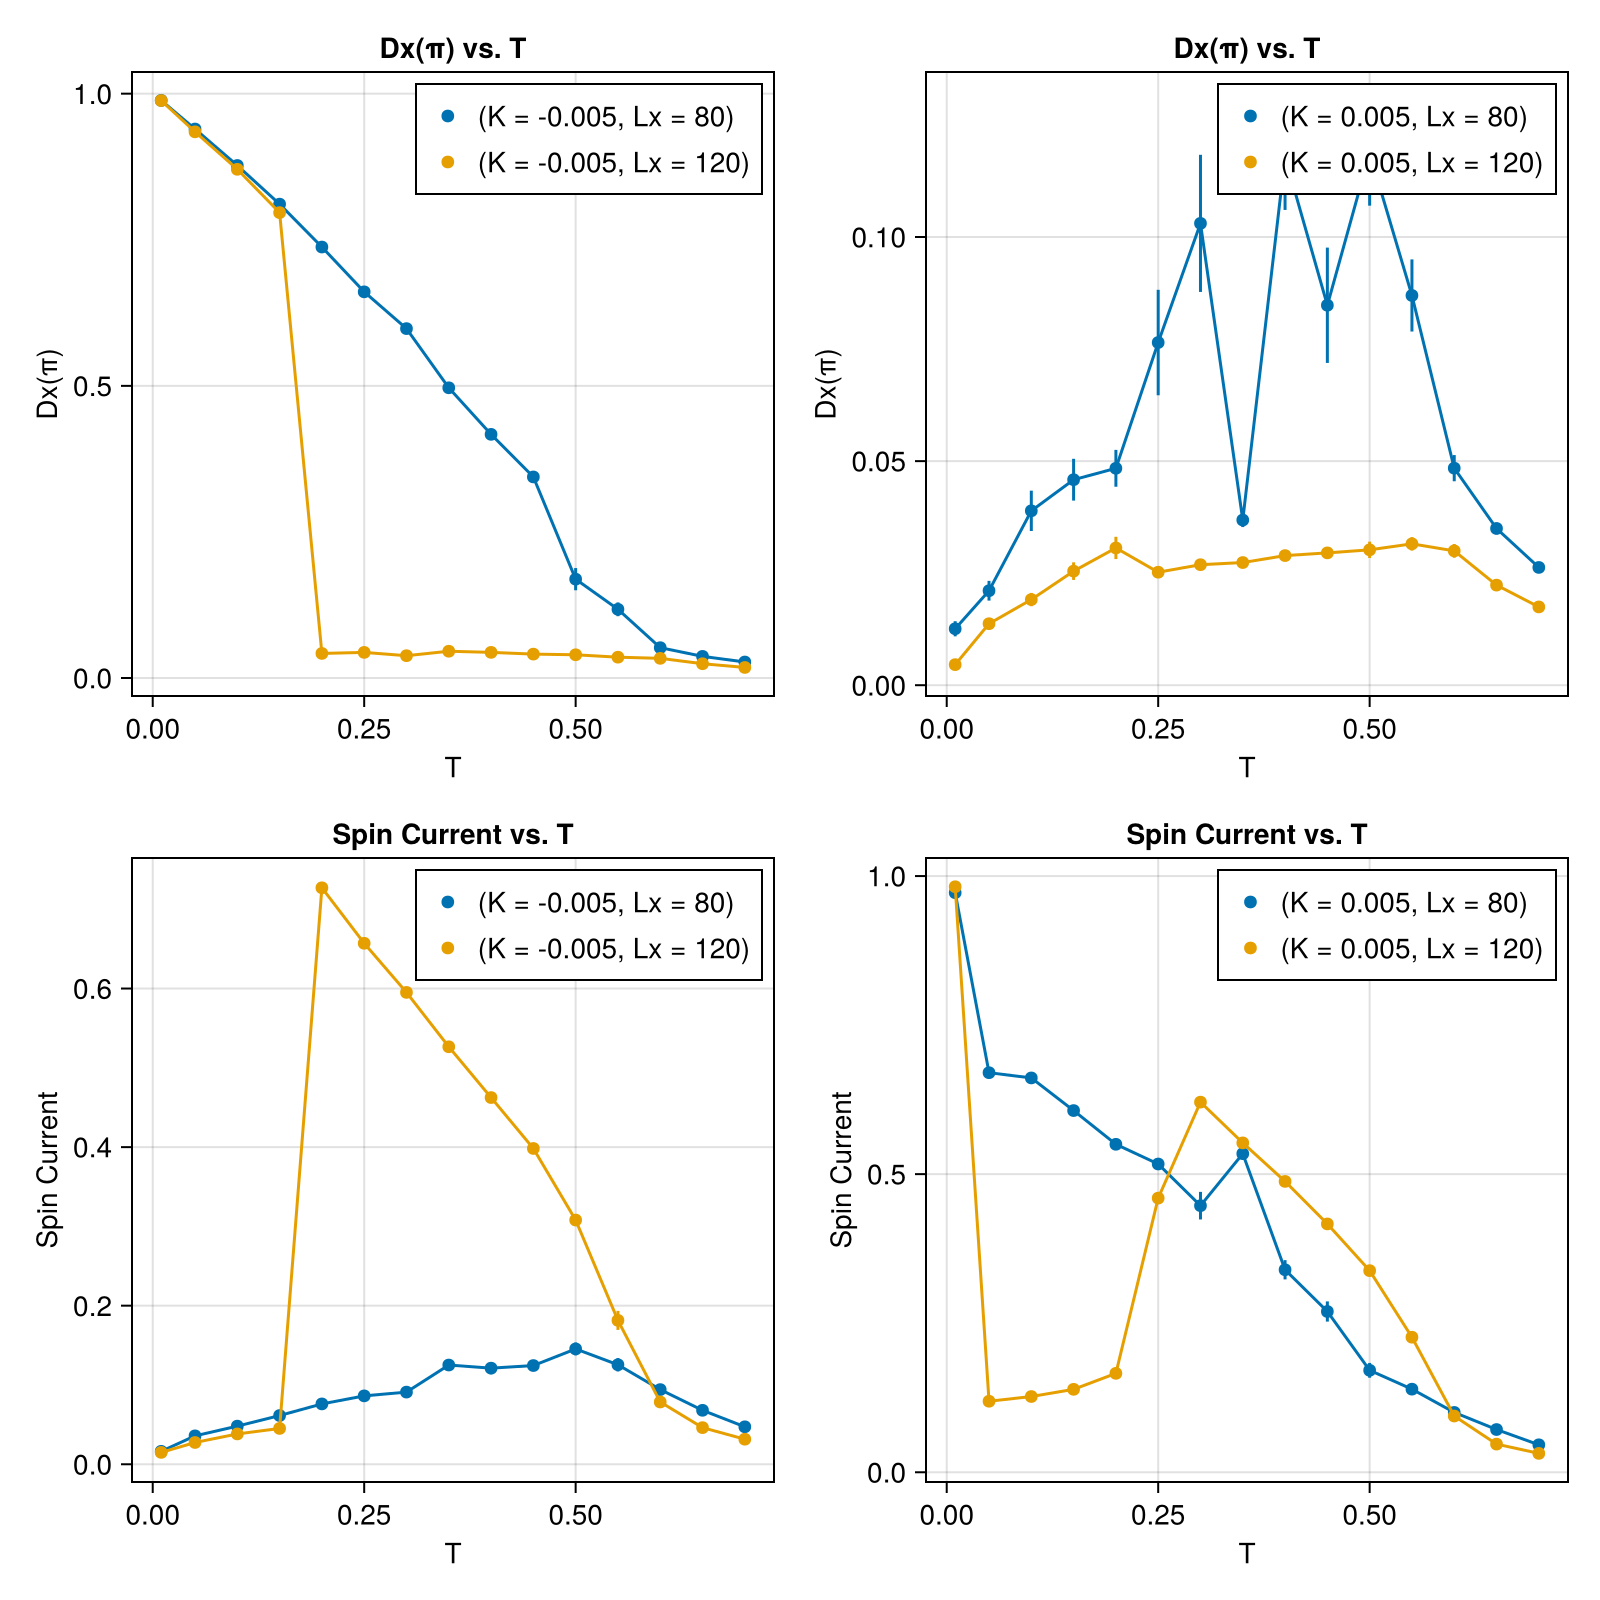

In [155]:
fig = Figure(size=(800, 800))

generatePlot(
    data[[1, 3]], :T, :Dxπ; fig,
    title="Dx(π) vs. T",
    xlabel="T",
    ylabel="Dx(π)",
    line=true
)
generatePlot(
    data[[2, 4]], :T, :Dxπ; fig, fig_pos=(1,2),
    title="Dx(π) vs. T",
    xlabel="T",
    ylabel="Dx(π)",
    line=true
)

generatePlot(
    data[[1, 3]], :T, :J_s; fig, fig_pos=(2,1),
    title="Spin Current vs. T",
    xlabel="T",
    ylabel="Spin Current",
    line=true
)
generatePlot(
    data[[2, 4]], :T, :J_s; fig, fig_pos=(2,2),
    title="Spin Current vs. T",
    xlabel="T",
    ylabel="Spin Current",
    line=true
)

# save("temp-sweep-plots/Dx-P-plots.png", fig)
fig

In [138]:
ungrouped_data = cleandata("../jobs/$jobname.results.json")

Row,T,K,Lx,Ly,Mag,Energy,Dxπ,Dyπ,P,J_s
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,80,80,0.000767±1.8e-5,-1.99499±8.5e-6,0.98849±0.00011,0.98848±0.00011,0.0163±0.0021,0.0163±0.0021
2,0.05,-0.005,80,80,0.001688±1.3e-5,-1.95467±3.9e-5,0.93955±0.00061,0.9395±0.00061,0.0352±0.0028,0.0359±0.0027
3,0.1,-0.005,80,80,0.002436±1.6e-5,-1.9036±2.8e-5,0.8771±0.0011,0.8771±0.0011,0.0462±0.003,0.0481±0.0031
4,0.15,-0.005,80,80,0.003±1.7e-5,-1.85168±3.8e-5,0.811±0.0013,0.8109±0.0013,0.0587±0.004,0.0615±0.0039
5,0.2,-0.005,80,80,0.003515±1.7e-5,-1.79894±5.9e-5,0.7376±0.0028,0.7375±0.0028,0.0573±0.0039,0.0761±0.0041
6,0.25,-0.005,80,80,0.003976±1.9e-5,-1.74506±6.4e-5,0.6609±0.0036,0.6608±0.0036,0.058±0.0036,0.0863±0.0035
7,0.3,-0.005,80,80,0.004397±1.7e-5,-1.69017±0.00012,0.598±0.0046,0.5979±0.0046,0.0721±0.0033,0.091±0.003
8,0.35,-0.005,80,80,0.004761±1.4e-5,-1.63378±0.00013,0.4967±0.0071,0.4966±0.0071,0.0986±0.0056,0.1252±0.0055
9,0.4,-0.005,80,80,0.005152±1.3e-5,-1.57597±0.00012,0.417±0.0093,0.4169±0.0093,0.0916±0.0067,0.1212±0.0077


In [139]:
function generate_mctime_plot(task_no::Int)
    fig = Figure(size=(800, 400))

    ax_P = fig[1,1] = Axis(
        fig,
        title="P vs. Bin #",
        xlabel="Bin #",
        ylabel="P",
        xminorticksvisible=true
    )
    ax_Dxπ = fig[1,2] = Axis(
        fig,
        title="Dx(π) vs. Bin #",
        xlabel="Bin #",
        ylabel="Dx(π)",
        xminorticksvisible=true
    )

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.meas.h5") do file
        observables = file["observables"]

        P_samples = read(observables, "P/samples")
        n = length(P_samples)
        init = 1
        lines!(
            ax_P,
            collect(init:n),
            P_samples[init:n],
            label="P"
        )
        Js_samples = read(observables, "J_s/samples")
        lines!(
            ax_P,
            collect(init:n),
            Js_samples[init:n],
            label="Spin Current"
        )
        axislegend(ax_P, position=:rb)

        Dxπ_samples = read(observables, "Dxπ/samples")
        lines!(
            ax_Dxπ,
            collect(init:n),
            Dxπ_samples[init:n],
        )
    end

    return fig
end

generate_mctime_plot (generic function with 1 method)

DataFrameRow
 Row │ T        K        Lx     Ly     Mag              Energy           Dxπ            Dyπ            P            J_s           
     │ Float64  Float64  Int64  Int64  Measurem…        Measurem…        Measurem…      Measurem…      Measurem…    Measurem…     
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  39 │     0.4   -0.005    120    120  0.003445±8.5e-6  -1.57764±4.9e-5  0.0439±0.0029  0.0439±0.0029  0.374±0.021  0.4625±0.0027

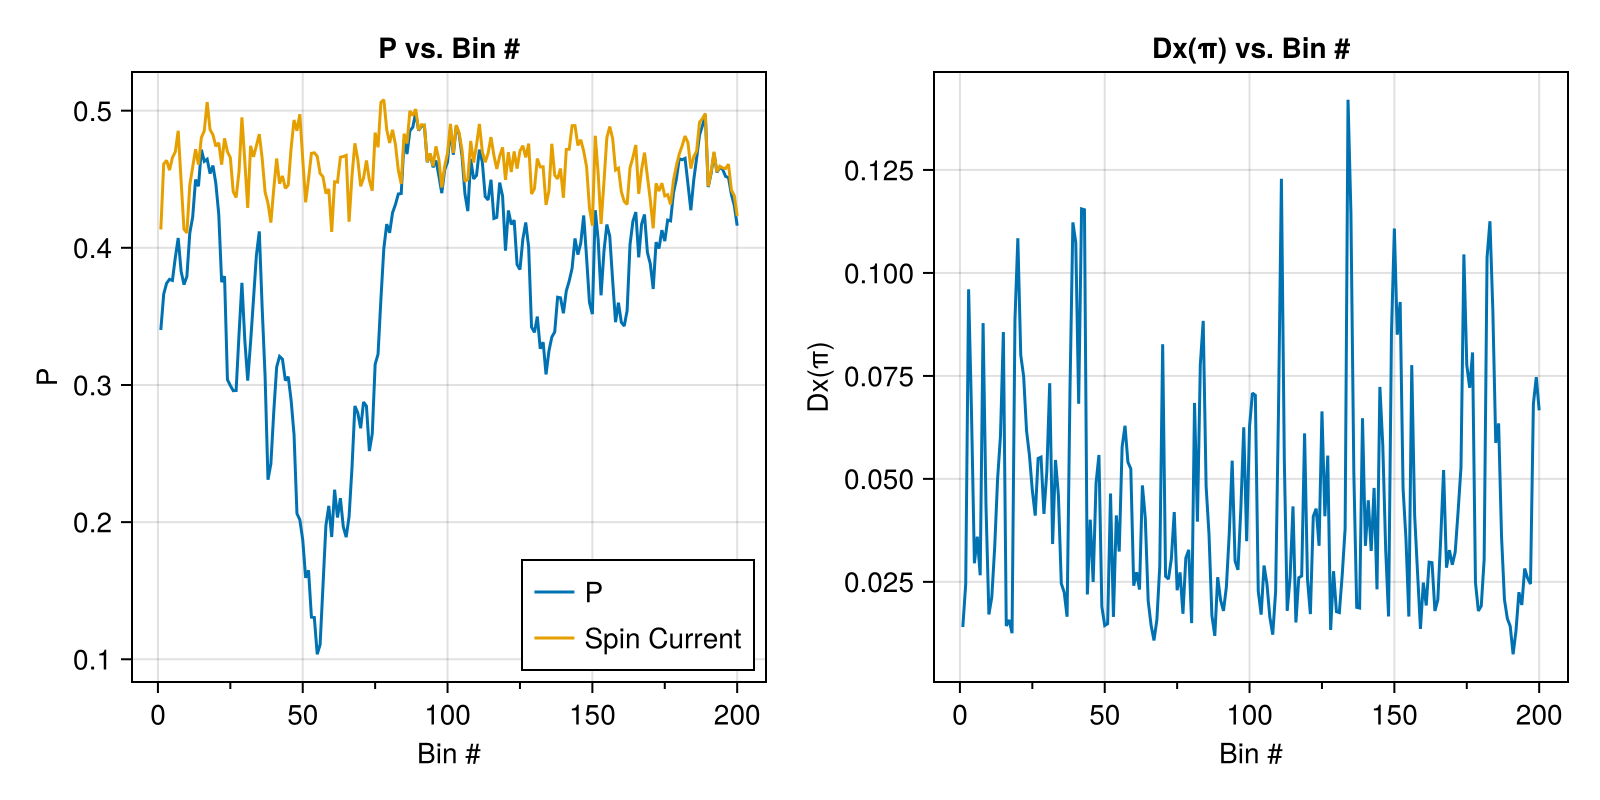

In [158]:
i = 39
print(ungrouped_data[i, :])
generate_mctime_plot(i)

In [141]:
filename = "../jobs/$jobname.data/task$(lpad(i, 4, "0"))/spins.jld2"
sweep_no = 50000

fig = Figure(size=(600, 600))
jldopen(filename, "r") do file
    spins = file["sweep$sweep_no"]
    spinxs = map(v -> v[1], spins)
    spinys = map(v -> v[2], spins)
    spinzs = map(v -> v[3], spins)
    strength = vec(spinzs)

    fig[1,1] = Axis(fig; title="Spins", backgroundcolor="black")
    arrows2d!(1:Lx, 1:Ly, spinxs, spinys, lengthscale=0.7, align=:center, color=strength, colorrange=(-1,1))
end

save("temp-sweep-plots/spins.png", fig)
fig

┌ Warning: Opening file with JLD2.MmapIO failed, falling back to IOStream
└ @ JLD2 /Users/XT/.julia/packages/JLD2/SgtOb/src/JLD2.jl:154


SystemError: SystemError: opening file "../jobs/large-sys.data/task0031/spins.jld2": No such file or directory

In [142]:
print(ungrouped_data[i, :])
filename = "../jobs/$jobname.data/task$(lpad(i, 4, "0"))/spins.jld2"

fig = Figure(size=(600, 600))
jldopen(filename, "r") do file
    spins = PeriodicArray(file["sweep$sweep_no"])
    Lx, Ly = size(spins)
    currs = Matrix{SVector{3, Float64}}(undef, Lx, Ly)
    for y in 1:Ly
        for x in 1:Lx
            currs[x, y] = spins[x, y] × spins[x+1, y]
        end
    end
    currxs = getindex.(currs, 1)
    currys = getindex.(currs, 2)
    strength = vec(getindex.(currs, 3))

    fig[1,1] = Axis(fig; title="Spin Currents", backgroundcolor="black")
    heatmap!(norm.(currs), colorrange=(0, 1))
    # arrows2d!(1:Lx, 1:Ly, currxs, currys, lengthscale=0.7, align=:center, color=strength, colorrange=(-1,1))
end

fig

DataFrameRow
 Row │ T        K        Lx     Ly     Mag              Energy           Dxπ              Dyπ              P              J_s          
     │ Float64  Float64  Int64  Int64  Measurem…        Measurem…        Measurem…        Measurem…        Measurem…      Measurem…    
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  31 │    0.01   -0.005    120    120  0.000506±5.0e-6  -1.99499±5.8e-6  0.988225±9.4e-5  0.988215±9.3e-5  0.0149±0.0016  0.015±0.0016

┌ Warning: Opening file with JLD2.MmapIO failed, falling back to IOStream
└ @ JLD2 /Users/XT/.julia/packages/JLD2/SgtOb/src/JLD2.jl:154


SystemError: SystemError: opening file "../jobs/large-sys.data/task0031/spins.jld2": No such file or directory